In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("LoanDecisioningApplicantTrainData.csv")
train_data.head()

,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Valuation,Property_Type,Loan_Status
0,17.0,Male,No,0.0,Graduate,No,200000,0.0,800000,360.0,0.0,50000,Real Property,N
1,29.0,Male,Yes,1.0,Graduate,No,500000,150000.0,1000000,360.0,1.0,300000,Real Property,Y
2,17.0,Male,Yes,0.0,Graduate,Yes,200000,0.0,800000,360.0,0.0,50000,Real Property,N
3,17.0,Male,Yes,0.0,Not Graduate,No,200000,2358.0,800000,360.0,0.0,50000,Real Property,N
4,20.0,Male,No,0.0,Graduate,No,200000,0.0,800000,360.0,0.0,50000,Real Property,N


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 760 non-null    float64
 1   Gender              753 non-null    object 
 2   Married             761 non-null    object 
 3   Dependents          744 non-null    float64
 4   Education           765 non-null    object 
 5   Self_Employed       727 non-null    object 
 6   ApplicantIncome     765 non-null    int64  
 7   CoapplicantIncome   765 non-null    float64
 8   LoanAmount          765 non-null    int64  
 9   Loan_Amount_Term    749 non-null    float64
 10  Credit_History      716 non-null    float64
 11  Property_Valuation  765 non-null    int64  
 12  Property_Type       765 non-null    object 
 13  Loan_Status         765 non-null    object 
dtypes: float64(5), int64(3), object(6)
memory usage: 83.8+ KB


In [4]:
train_data.isnull().sum()

Age                    5
Gender                12
Married                4
Dependents            21
Education              0
Self_Employed         38
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      16
Credit_History        49
Property_Valuation     0
Property_Type          0
Loan_Status            0
dtype: int64

In [5]:
train_data.drop(['Gender'], inplace= True, axis =1)

In [6]:
train_data.isnull().sum()

Age                    5
Married                4
Dependents            21
Education              0
Self_Employed         38
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      16
Credit_History        49
Property_Valuation     0
Property_Type          0
Loan_Status            0
dtype: int64

In [7]:
train_data['Married'] = train_data['Married'].fillna(value='NA')

In [8]:
train_data['Credit_History'] = train_data['Credit_History'].fillna(value=2) # mark Credit_History as 2 for blanks

In [9]:
train_data['Dependents'] = train_data['Dependents'].fillna(value=0) # mark Dependents as 0 for blanks

In [10]:
train_data.drop(['Loan_Amount_Term'], inplace= True, axis =1)

In [11]:
train_data['Married'] = train_data['Married'].fillna(value='NA')

In [12]:
train_data.isnull().sum()

Age                    5
Married                0
Dependents             0
Education              0
Self_Employed         38
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Credit_History         0
Property_Valuation     0
Property_Type          0
Loan_Status            0
dtype: int64

In [13]:
train_data.head()

,Age,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Valuation,Property_Type,Loan_Status
0,17.0,No,0.0,Graduate,No,200000,0.0,800000,0.0,50000,Real Property,N
1,29.0,Yes,1.0,Graduate,No,500000,150000.0,1000000,1.0,300000,Real Property,Y
2,17.0,Yes,0.0,Graduate,Yes,200000,0.0,800000,0.0,50000,Real Property,N
3,17.0,Yes,0.0,Not Graduate,No,200000,2358.0,800000,0.0,50000,Real Property,N
4,20.0,No,0.0,Graduate,No,200000,0.0,800000,0.0,50000,Real Property,N


In [14]:
train_data[['Self_Employed','Loan_Status']]

,Self_Employed,Loan_Status
0,No,N
1,No,Y
2,Yes,N
3,No,N
4,No,N
...,...,...
760,Yes,Y
761,Yes,Y
762,Yes,Y
763,Yes,Y


In [15]:
train_data.loc[train_data['Self_Employed'].isna(), ['Self_Employed','Loan_Status']]

,Self_Employed,Loan_Status
47,NaN,N
50,NaN,Y
58,NaN,Y
88,NaN,Y
94,NaN,N
99,NaN,N
125,NaN,Y
146,NaN,N
161,NaN,N
177,NaN,Y


In [16]:
nan_index = train_data.index[train_data['Self_Employed'].isna()].tolist()
train_data.drop(nan_index, inplace = True)

In [17]:
train_data.loc[train_data['Self_Employed'].isna(), ['Self_Employed','Loan_Status']]

,Self_Employed,Loan_Status


In [18]:
train_data.isnull().sum()

Age                   4
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Valuation    0
Property_Type         0
Loan_Status           0
dtype: int64

In [19]:
age_median = train_data['Age'].median()
train_data['Age'] = train_data['Age'].fillna(value=age_median) # mark Dependents as 0 for blanks

In [20]:
train_data.isnull().sum()

Age                   0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Valuation    0
Property_Type         0
Loan_Status           0
dtype: int64

In [21]:
#chnage the categorical data into numerical using OneHot Encoder
# Cols : Married,Education,Self_Employed,Property_Type, property_area, loan_status
# Married : Yes No NA
# Edu: Grad : 0 Non Grad : 1
# Employment: Self Employed, Employed
# Property_type: Real Prop: 1 Others: 0
# Property Area: Semiurban: 0 Urban: 1 Rural: both 0
# Loan Status: Yes: 1, No: 0
Marital_Status = train_data["Married"]
Marital_Status = pd.get_dummies(Marital_Status, prefix='Married')

Edu = train_data["Education"]
Edu = pd.get_dummies(Edu, drop_first = True)
Marital_Status.head()

Emp = train_data["Self_Employed"]
Emp = pd.get_dummies(Emp, prefix='Self Employed')

Prop_Type = train_data["Property_Type"]
Prop_Type = pd.get_dummies(Prop_Type, drop_first = True)
Prop_Type.head()

# Prop_Area = train_data["Property_Area"]
# Prop_Area = pd.get_dummies(Prop_Area, drop_first = True)
# Prop_Area.head()

Loan_Stat = train_data["Loan_Status"]
Loan_Stat = pd.get_dummies(Loan_Stat, drop_first = True, prefix='Loan Status')
Loan_Stat.head()

#train_data["Property_Area"].value_counts()

,Loan Status_Y
0,0
1,1
2,0
3,0
4,0


In [22]:
train_data.head()

,Age,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Valuation,Property_Type,Loan_Status
0,17.0,No,0.0,Graduate,No,200000,0.0,800000,0.0,50000,Real Property,N
1,29.0,Yes,1.0,Graduate,No,500000,150000.0,1000000,1.0,300000,Real Property,Y
2,17.0,Yes,0.0,Graduate,Yes,200000,0.0,800000,0.0,50000,Real Property,N
3,17.0,Yes,0.0,Not Graduate,No,200000,2358.0,800000,0.0,50000,Real Property,N
4,20.0,No,0.0,Graduate,No,200000,0.0,800000,0.0,50000,Real Property,N


In [23]:
#drop colums which are OneHotEncoded
train_data.drop(['Married','Education','Self_Employed','Property_Type','Loan_Status'], inplace = True, axis =1)

In [24]:
train_data.head()

,Age,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Valuation
0,17.0,0.0,200000,0.0,800000,0.0,50000
1,29.0,1.0,500000,150000.0,1000000,1.0,300000
2,17.0,0.0,200000,0.0,800000,0.0,50000
3,17.0,0.0,200000,2358.0,800000,0.0,50000
4,20.0,0.0,200000,0.0,800000,0.0,50000


In [25]:
#concatenate dataframe
data_train = pd.concat([train_data,Marital_Status,Edu,Emp,Prop_Type,Loan_Stat], axis =1)

In [26]:
data_train.head()

,Age,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Valuation,Married_NA,Married_No,Married_Yes,Not Graduate,Self Employed_No,Self Employed_Yes,Real Property,Loan Status_Y
0,17.0,0.0,200000,0.0,800000,0.0,50000,0,1,0,0,1,0,1,0
1,29.0,1.0,500000,150000.0,1000000,1.0,300000,0,0,1,0,1,0,1,1
2,17.0,0.0,200000,0.0,800000,0.0,50000,0,0,1,0,0,1,1,0
3,17.0,0.0,200000,2358.0,800000,0.0,50000,0,0,1,1,1,0,1,0
4,20.0,0.0,200000,0.0,800000,0.0,50000,0,1,0,0,1,0,1,0


In [27]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 764
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 727 non-null    float64
 1   Dependents          727 non-null    float64
 2   ApplicantIncome     727 non-null    int64  
 3   CoapplicantIncome   727 non-null    float64
 4   LoanAmount          727 non-null    int64  
 5   Credit_History      727 non-null    float64
 6   Property_Valuation  727 non-null    int64  
 7   Married_NA          727 non-null    uint8  
 8   Married_No          727 non-null    uint8  
 9   Married_Yes         727 non-null    uint8  
 10  Not Graduate        727 non-null    uint8  
 11  Self Employed_No    727 non-null    uint8  
 12  Self Employed_Yes   727 non-null    uint8  
 13  Real Property       727 non-null    uint8  
 14  Loan Status_Y       727 non-null    uint8  
dtypes: float64(4), int64(3), uint8(8)
memory usage: 51.1 KB


In [28]:
data_train.corr()

,Age,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Valuation,Married_NA,Married_No,Married_Yes,Not Graduate,Self Employed_No,Self Employed_Yes,Real Property,Loan Status_Y
Age,1.000000,0.092644,0.540615,-0.058332,0.487895,0.332690,0.172861,-0.035441,-0.067523,0.072810,0.104371,0.125183,-0.125183,0.207384,0.150172
Dependents,0.092644,1.000000,0.097265,0.019121,0.098164,0.020372,0.033062,-0.055962,-0.360685,0.367929,-0.007878,0.010813,-0.010813,0.014703,0.020108
ApplicantIncome,0.540615,0.097265,1.000000,-0.052056,0.978255,0.460755,0.497499,-0.008789,-0.088772,0.089770,-0.008302,0.075307,-0.075307,0.420608,0.332766
CoapplicantIncome,-0.058332,0.019121,-0.052056,1.000000,-0.041937,0.047981,0.038470,-0.022786,-0.122192,0.125249,-0.046072,-0.086419,0.086419,0.023102,0.093723
LoanAmount,0.487895,0.098164,0.978255,-0.041937,1.000000,0.441358,0.523713,-0.009512,-0.115845,0.116839,-0.029810,0.013296,-0.013296,0.429020,0.327036
Credit_History,0.332690,0.020372,0.460755,0.047981,0.441358,1.000000,0.622497,-0.016322,-0.184274,0.186043,-0.021334,-0.044376,0.044376,0.535742,0.691281
Property_Valuation,0.172861,0.033062,0.497499,0.038470,0.523713,0.622497,1.000000,-0.007756,-0.124493,0.125173,-0.034363,-0.213971,0.213971,0.603385,0.871446
Married_NA,-0.035441,-0.055962,-0.008789,-0.022786,-0.009512,-0.016322,-0.007756,1.000000,-0.051406,-0.106285,-0.034384,0.037446,-0.037446,-0.033832,0.004407
Married_No,-0.067523,-0.360685,-0.088772,-0.122192,-0.115845,-0.184274,-0.124493,-0.051406,1.000000,-0.987557,0.051151,0.077010,-0.077010,-0.097885,-0.121085
Married_Yes,0.072810,0.367929,0.089770,0.125249,0.116839,0.186043,0.125173,-0.106285,-0.987557,1.000000,-0.045514,-0.082571,0.082571,0.102787,0.119865


In [29]:
data_train['Property_Valuation']

0       50000
1      300000
2       50000
3       50000
4       50000
        ...  
760    700000
761    700000
762    700000
763    700000
764    700000
Name: Property_Valuation, Length: 727, dtype: int64

In [30]:
data_train['Real Property'] = data_train['Real Property'].astype('int64')

In [31]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 764
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 727 non-null    float64
 1   Dependents          727 non-null    float64
 2   ApplicantIncome     727 non-null    int64  
 3   CoapplicantIncome   727 non-null    float64
 4   LoanAmount          727 non-null    int64  
 5   Credit_History      727 non-null    float64
 6   Property_Valuation  727 non-null    int64  
 7   Married_NA          727 non-null    uint8  
 8   Married_No          727 non-null    uint8  
 9   Married_Yes         727 non-null    uint8  
 10  Not Graduate        727 non-null    uint8  
 11  Self Employed_No    727 non-null    uint8  
 12  Self Employed_Yes   727 non-null    uint8  
 13  Real Property       727 non-null    int64  
 14  Loan Status_Y       727 non-null    uint8  
dtypes: float64(4), int64(4), uint8(7)
memory usage: 56.1 KB


In [32]:
data_train['Real Property'].value_counts()

1    514
0    213
Name: Real Property, dtype: int64

In [33]:
data_train[data_train.columns[0:]].corr()['Loan Status_Y'][:-1]

Age                   0.150172
Dependents            0.020108
ApplicantIncome       0.332766
CoapplicantIncome     0.093723
LoanAmount            0.327036
Credit_History        0.691281
Property_Valuation    0.871446
Married_NA            0.004407
Married_No           -0.121085
Married_Yes           0.119865
Not Graduate         -0.008788
Self Employed_No     -0.149905
Self Employed_Yes     0.149905
Real Property         0.606724
Name: Loan Status_Y, dtype: float64

In [34]:
# if (data_train[data_train['Real Property']] == 1):
#     lmi = np.divide(data_train['LoanAmount'],data_train['Property_Valuation'])
# data_train['LMI'] = lmi

In [35]:
data_train.head()

,Age,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Valuation,Married_NA,Married_No,Married_Yes,Not Graduate,Self Employed_No,Self Employed_Yes,Real Property,Loan Status_Y
0,17.0,0.0,200000,0.0,800000,0.0,50000,0,1,0,0,1,0,1,0
1,29.0,1.0,500000,150000.0,1000000,1.0,300000,0,0,1,0,1,0,1,1
2,17.0,0.0,200000,0.0,800000,0.0,50000,0,0,1,0,0,1,1,0
3,17.0,0.0,200000,2358.0,800000,0.0,50000,0,0,1,1,1,0,1,0
4,20.0,0.0,200000,0.0,800000,0.0,50000,0,1,0,0,1,0,1,0


In [36]:
data_train[data_train.columns[0:]].corr()['Loan Status_Y'][:]

Age                   0.150172
Dependents            0.020108
ApplicantIncome       0.332766
CoapplicantIncome     0.093723
LoanAmount            0.327036
Credit_History        0.691281
Property_Valuation    0.871446
Married_NA            0.004407
Married_No           -0.121085
Married_Yes           0.119865
Not Graduate         -0.008788
Self Employed_No     -0.149905
Self Employed_Yes     0.149905
Real Property         0.606724
Loan Status_Y         1.000000
Name: Loan Status_Y, dtype: float64

In [37]:
data_train[data_train['Loan Status_Y']==0]

,Age,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Valuation,Married_NA,Married_No,Married_Yes,Not Graduate,Self Employed_No,Self Employed_Yes,Real Property,Loan Status_Y
0,17.0,0.0,200000,0.0,800000,0.0,50000,0,1,0,0,1,0,1,0
2,17.0,0.0,200000,0.0,800000,0.0,50000,0,0,1,0,0,1,1,0
3,17.0,0.0,200000,2358.0,800000,0.0,50000,0,0,1,1,1,0,1,0
4,20.0,0.0,200000,0.0,800000,0.0,50000,0,1,0,0,1,0,1,0
5,18.0,2.0,120000,4196.0,800000,0.0,50000,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,18.0,0.0,80000,4232.0,700000,0.0,0,0,1,0,0,1,0,0,0
706,18.0,0.0,80000,0.0,700000,0.0,0,0,1,0,0,1,0,0,0
707,18.0,0.0,80000,0.0,700000,0.0,0,0,1,0,0,0,1,0,0
709,20.0,0.0,200000,1600.0,700000,0.0,0,0,1,0,1,1,0,0,0


In [38]:
data_train.shape

(727, 15)

In [39]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 764
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 727 non-null    float64
 1   Dependents          727 non-null    float64
 2   ApplicantIncome     727 non-null    int64  
 3   CoapplicantIncome   727 non-null    float64
 4   LoanAmount          727 non-null    int64  
 5   Credit_History      727 non-null    float64
 6   Property_Valuation  727 non-null    int64  
 7   Married_NA          727 non-null    uint8  
 8   Married_No          727 non-null    uint8  
 9   Married_Yes         727 non-null    uint8  
 10  Not Graduate        727 non-null    uint8  
 11  Self Employed_No    727 non-null    uint8  
 12  Self Employed_Yes   727 non-null    uint8  
 13  Real Property       727 non-null    int64  
 14  Loan Status_Y       727 non-null    uint8  
dtypes: float64(4), int64(4), uint8(7)
memory usage: 56.1 KB


## Test Set

In [40]:
test_data = pd.read_csv("LoanDecisioningApplicantTestData.csv")
test_data.head()

,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Valuation,Property_Type,Unnamed: 13
0,17.0,Male,No,0.0,Graduate,No,200000.0,0.0,500000.0,360.0,0.0,700000.0,Real Property,N
1,25.0,Male,Yes,1.0,Graduate,No,400000.0,150000.0,700000.0,360.0,0.0,700000.0,Real Property,N
2,17.0,Male,Yes,0.0,Graduate,Yes,200000.0,0.0,500000.0,360.0,0.0,700000.0,Real Property,N
3,17.0,Male,Yes,0.0,Not Graduate,No,200000.0,2358.0,500000.0,360.0,0.0,700000.0,Real Property,N
4,20.0,Male,No,0.0,Graduate,No,200000.0,0.0,500000.0,360.0,0.0,700000.0,Real Property,N


In [41]:
#Preprocessing
test_data.drop(['Gender'], inplace= True, axis =1)
test_data['Married'] = test_data['Married'].fillna(value='NA')
test_data['Credit_History'] = test_data['Credit_History'].fillna(value=2) # mark Credit_History as 2 for blanks
test_data['Dependents'] = test_data['Dependents'].fillna(value=0) # mark Dependents as 0 for blanks
test_data.drop(['Loan_Amount_Term'], inplace= True, axis =1)
nan_index = test_data.index[test_data['Self_Employed'].isna()].tolist()
test_data.drop(nan_index, inplace = True)
age_median = test_data['Age'].median()
test_data['Age'] = test_data['Age'].fillna(value=age_median) # mark Dependents as 0 for blanks

#chnage the categorical data into numerical using OneHot Encoder
# Cols : Married,Education,Self_Employed,Property_Type, property_area, loan_status
# Married : Yes No NA
# Edu: Grad : 0 Non Grad : 1
# Employment: Self Employed, Employed
# Property_type: Real Prop: 1 Others: 0
# Property Area: Semiurban: 0 Urban: 1 Rural: both 0
# Loan Status: Yes: 1, No: 0
Marital_Status = test_data["Married"]
Marital_Status = pd.get_dummies(Marital_Status, prefix='Married')

Edu = test_data["Education"]
Edu = pd.get_dummies(Edu, drop_first = True)
Marital_Status.head()

Emp = test_data["Self_Employed"]
Emp = pd.get_dummies(Emp, prefix='Self Employed')

Prop_Type = test_data["Property_Type"]
Prop_Type = pd.get_dummies(Prop_Type, drop_first = True)

# Prop_Area = test_data["Property_Area"]
# Prop_Area = pd.get_dummies(Prop_Area, drop_first = True)

#train_data["Property_Area"].value_counts()
test_data.head()

#drop colums which are OneHotEncoded
test_data.drop(['Married','Education','Self_Employed','Property_Type'], inplace = True, axis =1)

#concatenate dataframe
data_test = pd.concat([test_data,Marital_Status,Edu,Emp,Prop_Type], axis =1)

In [42]:
data_test.head()

,Age,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Valuation,Unnamed: 13,Married_NA,Married_No,Married_Yes,Not Graduate,Self Employed_No,Self Employed_Yes,Real Property
0,17.0,0.0,200000.0,0.0,500000.0,0.0,700000.0,N,0,1,0,0,1,0,1
1,25.0,1.0,400000.0,150000.0,700000.0,0.0,700000.0,N,0,0,1,0,1,0,1
2,17.0,0.0,200000.0,0.0,500000.0,0.0,700000.0,N,0,0,1,0,0,1,1
3,17.0,0.0,200000.0,2358.0,500000.0,0.0,700000.0,N,0,0,1,1,1,0,1
4,20.0,0.0,200000.0,0.0,500000.0,0.0,700000.0,N,0,1,0,0,1,0,1


In [43]:
# lmi = np.divide(data_test['LoanAmount'],data_test['Property_Valuation'])
# data_test['LMI'] = lmi

In [44]:
data_test.head()

,Age,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Valuation,Unnamed: 13,Married_NA,Married_No,Married_Yes,Not Graduate,Self Employed_No,Self Employed_Yes,Real Property
0,17.0,0.0,200000.0,0.0,500000.0,0.0,700000.0,N,0,1,0,0,1,0,1
1,25.0,1.0,400000.0,150000.0,700000.0,0.0,700000.0,N,0,0,1,0,1,0,1
2,17.0,0.0,200000.0,0.0,500000.0,0.0,700000.0,N,0,0,1,0,0,1,1
3,17.0,0.0,200000.0,2358.0,500000.0,0.0,700000.0,N,0,0,1,1,1,0,1
4,20.0,0.0,200000.0,0.0,500000.0,0.0,700000.0,N,0,1,0,0,1,0,1


In [45]:
data_test.shape

(259, 15)

## Feature Selection

In [46]:
data_train.columns

Index(['Age', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Credit_History', 'Property_Valuation', 'Married_NA',
       'Married_No', 'Married_Yes', 'Not Graduate', 'Self Employed_No',
       'Self Employed_Yes', 'Real Property', 'Loan Status_Y'],
      dtype='object')

In [47]:
X = data_train.loc[:, ['Age', 'ApplicantIncome',
       'LoanAmount', 'Credit_History', 'Real Property', 'Property_Valuation']]
X.head()

,Age,ApplicantIncome,LoanAmount,Credit_History,Real Property,Property_Valuation
0,17.0,200000,800000,0.0,1,50000
1,29.0,500000,1000000,1.0,1,300000
2,17.0,200000,800000,0.0,1,50000
3,17.0,200000,800000,0.0,1,50000
4,20.0,200000,800000,0.0,1,50000


In [48]:
X.isnull().sum()

Age                   0
ApplicantIncome       0
LoanAmount            0
Credit_History        0
Real Property         0
Property_Valuation    0
dtype: int64

In [49]:
y = data_train.iloc[:, 14]
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan Status_Y, dtype: uint8

In [50]:
# Important feature using ExtraTreesRegressor
X_check = data_train.loc[:, ['Age', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Credit_History', 'Married_NA',
       'Married_No', 'Married_Yes', 'Not Graduate', 'Self Employed_No',
       'Self Employed_Yes', 'Real Property', 'Property_Valuation']]

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_check, y)

ExtraTreesRegressor()

In [51]:
print(selection.feature_importances_)

[5.10384307e-02 3.14315209e-04 2.40557986e-02 5.40079736e-05
 1.48061651e-02 2.98681594e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.24027517e-04 4.99400495e-05 1.72764438e-04
 2.26333237e-02 5.88069633e-01]


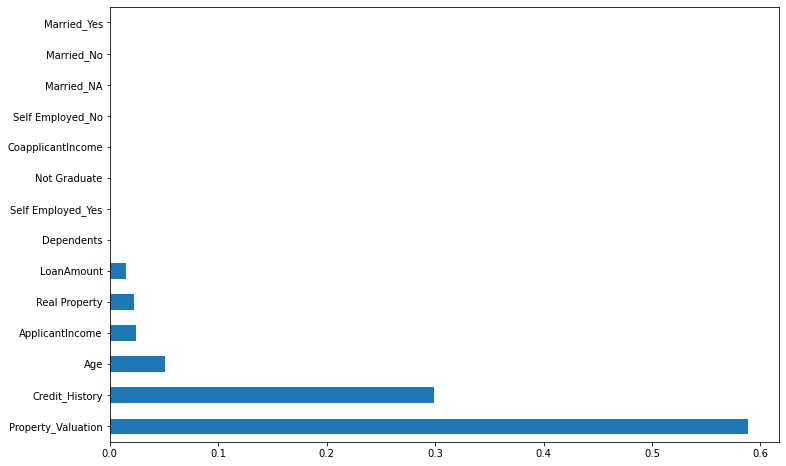

In [52]:
#plot graph of feature importances for better visualization . Took all the features and saw the result

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_check.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Fitting Logistic Regression Model

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 36)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred = lr.predict(X_test)
print(y_pred)

[0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0
 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1]


In [56]:
lr.score(X_train, y_train)

1.0

In [57]:
lr.score(X_test, y_test)

0.9931506849315068

In [58]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [59]:
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9383561643835616

In [60]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

1.0

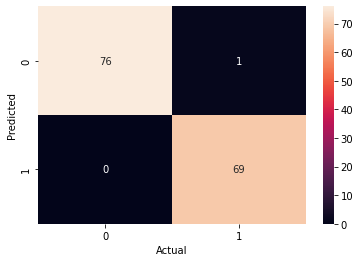

In [61]:
#confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred,rownames=['Predicted'],colnames=['Actual'])
sns.heatmap(confusion_matrix, annot = True)
plt.show()

In [62]:
#printing accuracy : correct outcomes (having prob 1)/total outcomes
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9931506849315068


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.99      1.00      0.99        69

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146



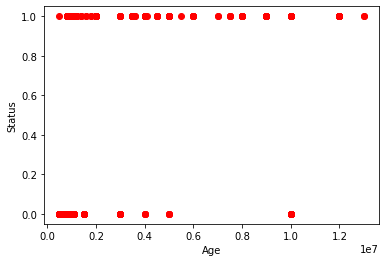

In [64]:
plt.scatter(X_train['LoanAmount'], y_train, color='r')
#plt.plot(X_test, y_pred)
plt.xlabel("Age")
plt.ylabel("Status")
plt.show()

## Save the model to reuse it again

In [65]:
import pickle
# open a file, where you ant to store the data
file = open('loanApplicant_lr2.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)

In [66]:
model = open('loanApplicant_lr.pkl','rb')
log_reg = pickle.load(model)

In [67]:
y_prediction = log_reg.predict(X_test)

In [68]:
metrics.accuracy_score(y_test,y_pred)

0.9931506849315068